In [17]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# generate random
#x = torch.randn(10,1) 
#print (x)

tensor([[ 1.1988],
        [ 0.6816],
        [-1.2161],
        [-0.3153],
        [ 0.8207],
        [ 0.1641],
        [-0.7474],
        [-1.7270],
        [-0.3952],
        [-0.6377]])


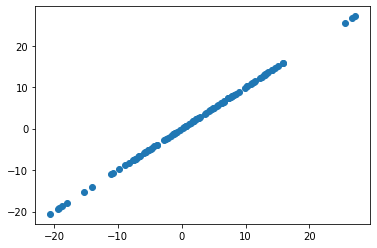

In [3]:
#x = torch.randn(100,1) *10
#print(x)
#y = x
#plt.plot(x.numpy(), y.numpy(), 'o')

Text(0.5, 0, 'x')

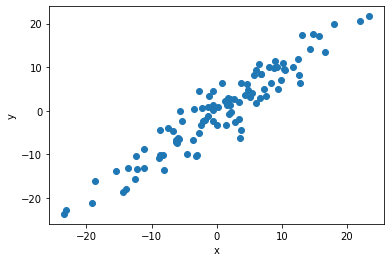

In [18]:
x = torch.randn(100,1) *10
y = x + 3*torch.randn(100, 1)
plt.plot(x.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [19]:
# define object orientated model initialization
class LR(nn.Module):
  # constructor
  # self represent the instance itself
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [20]:
torch.manual_seed(1)
model = LR(1,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [21]:
[w,b] = model.parameters()
#print(w,b)
w1 = w[0][0]
b1 = b[0]
print (w1,b1)

tensor(0.5153, grad_fn=<SelectBackward0>) tensor(-0.4414, grad_fn=<SelectBackward0>)


In [22]:
[w,b] = model.parameters()
w1 = w[0][0].item()
b1 = b[0].item()
print (w1,b1)

0.5152631998062134 -0.44137823581695557


In [23]:
def get_params():
  return (w[0][0].item(), b[0].item())

In [24]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 +b1
  plt.plot(x1, y1, 'r')
  plt.scatter(x, y)
  plt.show()

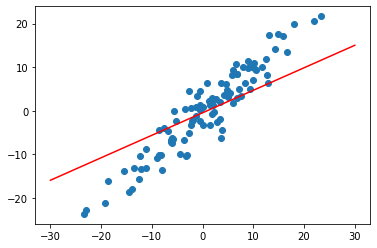

In [25]:
plot_fit('Initial Model')
# this is random weight assigend, need minimizing loss function 

In [26]:
# loss function
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.01)

In [27]:
# if we only sepcify one epoch, it will result in under fitting; if too many, it will be overfitting
epochs = 100
losses = []
for i in range(epochs):
  
  y_pred = model.forward(x)
  loss = criterion(y_pred, y)
  print ('epoch: ', i, "loss ", loss.item())

  losses.append(loss)
  optimizer.zero_grad() # set the initial gradient is 0
  loss.backward()
  optimizer.step()

epoch:  0 loss  28.914575576782227
epoch:  1 loss  20.61296844482422
epoch:  2 loss  15.965326309204102
epoch:  3 loss  13.363329887390137
epoch:  4 loss  11.906599044799805
epoch:  5 loss  11.091031074523926
epoch:  6 loss  10.634418487548828
epoch:  7 loss  10.378766059875488
epoch:  8 loss  10.235618591308594
epoch:  9 loss  10.155462265014648
epoch:  10 loss  10.110568046569824
epoch:  11 loss  10.085415840148926
epoch:  12 loss  10.071319580078125
epoch:  13 loss  10.063411712646484
epoch:  14 loss  10.058968544006348
epoch:  15 loss  10.056467056274414
epoch:  16 loss  10.055052757263184
epoch:  17 loss  10.054245948791504
epoch:  18 loss  10.053781509399414
epoch:  19 loss  10.053510665893555
epoch:  20 loss  10.053346633911133
epoch:  21 loss  10.053242683410645
epoch:  22 loss  10.053173065185547
epoch:  23 loss  10.05312442779541
epoch:  24 loss  10.05308723449707
epoch:  25 loss  10.053055763244629
epoch:  26 loss  10.05302906036377
epoch:  27 loss  10.053004264831543
epoch:

Text(0.5, 0, 'epoch')

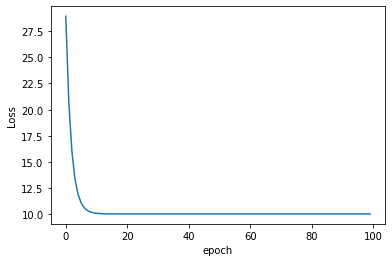

In [28]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("epoch")

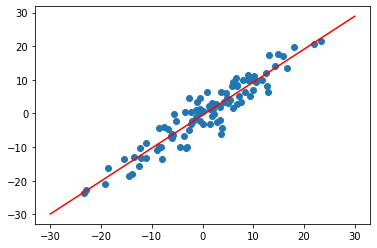

In [29]:
plot_fit("Trained Model")